In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load dataset
data = pd.read_csv('creditcard_cleaned.csv')

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']


In [3]:
# Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
# Clean NaN values before evaluation
# Remove any rows with missing values in target or prediction
y_test = y_test.dropna()
X_test = X_test.loc[y_test.index]  # keep same indexes

# Make predictions again (fresh)
y_pred = model.predict(X_test)


In [9]:
# Step 5: Model Evaluation (Final Fixed Version)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
[[5145    1]
 [   5   16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5146
         1.0       0.94      0.76      0.84        21

    accuracy                           1.00      5167
   macro avg       0.97      0.88      0.92      5167
weighted avg       1.00      1.00      1.00      5167


ROC-AUC Score: 0.8808552181074528


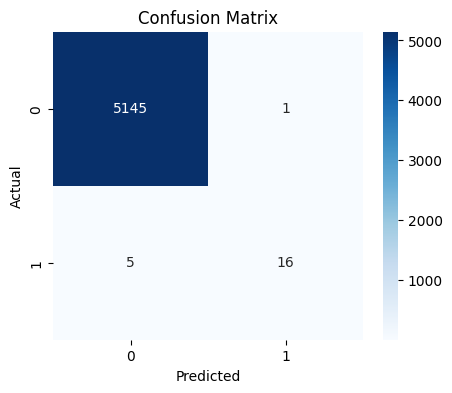

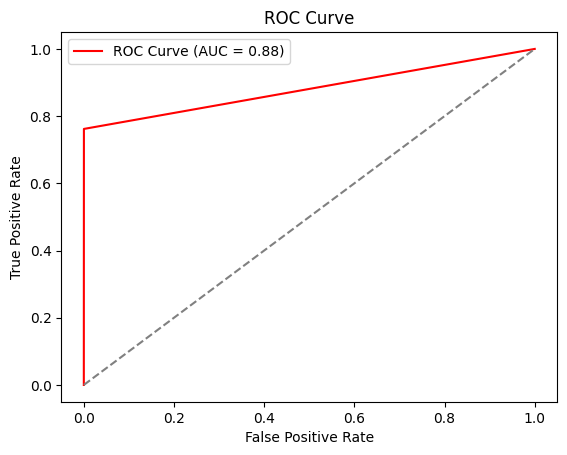

In [10]:
# Confusion Matrix Plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

